In [16]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

import holoviews as hv
hv.extension('bokeh')


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=1200,
    height=600,
    rot=90,
    title='Cryptocurrency Market Data: Returns for Several Holding Periods (%)',
    ylabel= 'Return (%)',
    xlabel='Cryptocurrency Name',
    value_label='Return in the Period (%)'
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (Return in the Period (%))

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = range(1,12)
list(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using df_market_data
    # 3. Append the model.inertia_ to the inertia list
    
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)
    
inertia

C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[287.0,
 195.82021818036043,
 123.19048183836956,
 79.02243535120975,
 65.40592346140595,
 52.03884061602037,
 43.98978096337513,
 36.935432610544645,
 32.67889912496265,
 28.165433305979256,
 23.723936270550084]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
dic_inertia = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame(dic_inertia)

inertia_df.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


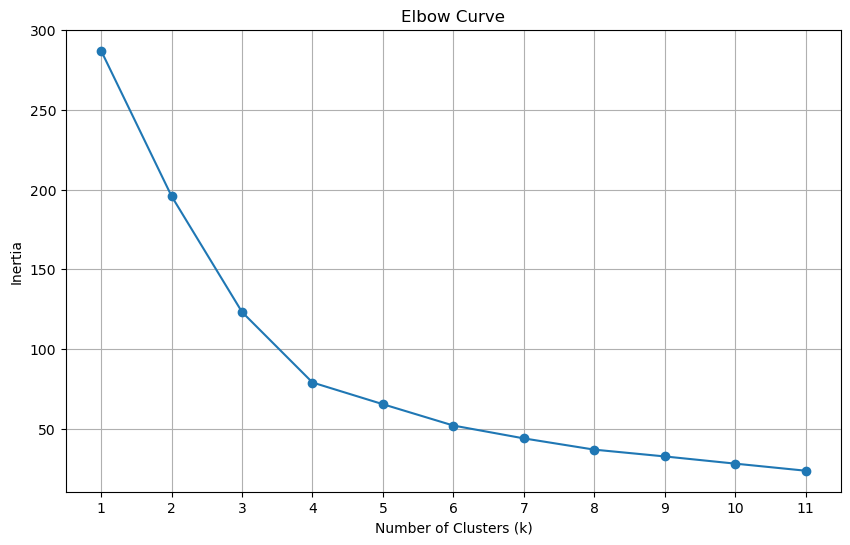

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(inertia_df['k'], inertia_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(inertia_df['k'])
plt.grid(True)

# Assign the plot to a variable
elbow_curve_plot = plt

plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k would be 4 since the elbow shape starts there

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)


In [13]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
# Predict the clusters to group the cryptocurrencies using the original data
clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
clusters

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [ ]:
# Create a copy of the DataFrame
df_market_data_scaled = df_market_data.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled['cluster_original'] = clusters


# Display sample data
df_market_data_scaled.head()

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster_original",
    cmap="rainbow",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)"
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame
market_data_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = Explained Variance of PC1 + Explained Variance of PC2 + Explained Variance of PC3
Total Explained Variance = 0.3719856 + 0.34700813 + 0.17603793
Total Explained Variance ≈ 0.89503166

Therefore, the total explained variance of the three principal components is approximately 0.895, or 89.5%. This indicates that these three principal components collectively capture about 89.5% of the variability in the original data.

In [21]:
# Creating a new DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(market_data_pca, columns=['PC1','PC2','PC3'])

# Copy the crypto names from the original data
df_market_data_pca['coin_id'] = df_market_data_scaled.index

# Set the coin_id column as index
df_market_data_pca = df_market_data_pca.set_index('coin_id')

# Display sample data
df_market_data_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  
k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [23]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using df_market_data_pca
    # 3. Append the model.inertia_ to the inertia list

for i in k:
    model_pca = KMeans(n_clusters = i)
    model_pca.fit(df_market_data_pca)
    inertia_pca.append(model_pca.inertia_)

inertia_pca

C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[256.87408556789234,
 168.81189630685213,
 93.77462568057298,
 49.665496651797355,
 37.87874703346249,
 27.618971787957427,
 21.13405603747361,
 17.01696214007742,
 13.667065268858192,
 10.484890485976921,
 8.153175154624638]

In [24]:
# Create a dictionary with the data to plot the Elbow curve
inertia_pca = {'k':k, 'inertia_pca':inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
inertia_pca_df = pd.DataFrame(inertia_pca)

inertia_pca_df = inertia_pca_df.set_index('k')
inertia_pca_df


,inertia_pca
k,
1,256.874086
2,168.811896
3,93.774626
4,49.665497
5,37.878747
6,27.618972
7,21.134056
8,17.016962
9,13.667065


In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart to identify the optimal value for k
inertia_pca_plot = inertia_pca_df['inertia_pca'].hvplot(
    title  = 'Principal Components of the Standarized Performance: Inertia v/s Number of Clusters',
    xlabel = 'Number of Clusters (k)',
    ylabel = 'Inertia (units)'     
)

inertia_pca_plot

:Curve   [k]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4, again


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No, even though the elbow curves are slightly different the k value of 4 is still the best with the PCA data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
k = 4
model_pca = KMeans(n_clusters=k, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)


C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster = model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values
cluster[0:5]

array([1, 1, 0, 0, 1])

In [33]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_clustered = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_clustered['cluster_pca'] = cluster

# Display sample data
df_market_data_pca_clustered.head()


,PC1,PC2,PC3,cluster_pca
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [30]:
df_market_data_pca.describe()

,PC1,PC2,PC3,cluster_pca
count,4.100000e+01,4.100000e+01,4.100000e+01,41.000000
mean,2.572468e-17,-5.077239e-17,2.978647e-17,0.439024
std,1.633706e+00,1.577905e+00,1.123865e+00,0.672636
min,-1.157800e+00,-3.896891e+00,-1.986985e+00,0.000000
25%,-5.931422e-01,-4.944088e-01,-6.633884e-01,0.000000
50%,-4.502111e-01,-1.510195e-01,-1.149420e-01,0.000000
75%,-3.062723e-01,4.929762e-01,6.003029e-01,1.000000
max,8.089018e+00,6.767679e+00,2.846143e+00,3.000000


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_pca = df_market_data_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="cluster_pca",
    cmap="rainbow",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA)",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2"
)

# Show the scatter plot
scatter_pca


:Scatter   [PC1]   (PC2,cluster_pca,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
elbow_curve_plot + inertia_pca_plot

In [ ]:
# Composite plot to contrast the clusters
scatter_plot + scatter_pca

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The inertia for the clusters with the PCA features is way lower than that of the original features. The values within each cluster are much closer together and easier to distinguish compared to the ones in the original data. The PCA plot also better separated the two outliers celsius-degree-token and ethlend. In general it seems that the clusters held the same coins even though coins like tezos and iota were much closer to the other cluster, so it seems that even with the loss of 10% data that the accuracy was still good.